# Autoencoder Model Save (Min 8 Node)

### Import List

In [2]:
import matplotlib.pyplot as plt
import mglearn
import numpy as np
import os
import random

### Method Definition

In [3]:
base_dir = "..\\..\\..\\data\\BLE_data\\"
def read_test_data(set_num, model_name, mode):
    if model_name == 5:
        raw_data = np.loadtxt(base_dir + "raw_data\\in_" + mode + "_" + str(set_num) + '.csv', delimiter=',', dtype=np.float32)
    elif model_name == 6:
        raw_data = np.loadtxt(base_dir + "raw_data\\out_" + mode + "_" + str(set_num) + '.csv', delimiter=',', dtype=np.float32)
    b_data    = raw_data[:,0:3]
    cell_data = raw_data[:,3:13]

    return b_data, cell_data

def read_denoised_test_data(set_num, model_name, mode):
    if model_name == 5:
        raw_data = np.loadtxt(base_dir + "filtered_data\\in_" + mode + "_" + str(set_num) + '_denoised.csv', delimiter=',', dtype=np.float32)
    elif model_name == 6:
        raw_data = np.loadtxt(base_dir + "filtered_data\\out_" + mode + "_" + str(set_num) + '_denoised.csv', delimiter=',', dtype=np.float32)
    b_data    = raw_data[:,0:3]
    cell_data = raw_data[:,3:13]

    return b_data, cell_data

def make_plot(y, num, begin, end):  
    fig = plt.figure(figsize=(15, 5))
    fig.patch.set_facecolor('xkcd:white')
    x = range(len(y))
    plt.bar(x, y, color="blue")
    plt.axis([0, num, begin, end])
    plt.show()

## Start

In [4]:
# model_name: 5 (car_in) / 6 (car_out)
# Car-in data
model_name = 5
set_num = 6000
train_set_num = int(set_num * 0.75)
test_set_num = int(set_num * 0.25)

x_in_train_noisy, y_in_train_noisy = read_test_data(train_set_num, model_name, "train")
x_in_train_denoised, y_in_train_denoised = read_denoised_test_data(train_set_num, model_name, "train")
x_in_test_noisy, y_in_test_noisy = read_test_data(test_set_num, model_name, "test")
x_in_test_denoised, y_in_test_denoised = read_denoised_test_data(test_set_num, model_name, "test")

In [5]:
# model_name: 5 (car_in) / 6 (car_out)
# Car-out data
model_name = 6
set_num = 6000
train_set_num = int(set_num * 0.75)
test_set_num = int(set_num * 0.25)

x_out_train_noisy, y_out_train_noisy = read_test_data(train_set_num, model_name, "train")
x_out_train_denoised, y_out_train_denoised = read_denoised_test_data(train_set_num, model_name, "train")
x_out_test_noisy, y_out_test_noisy = read_test_data(test_set_num, model_name, "test")
x_out_test_denoised, y_out_test_denoised = read_denoised_test_data(test_set_num, model_name, "test")

In [6]:
# Car-in
ae_x_in_train_noisy = x_in_train_noisy.astype('float32') / -100.
ae_x_in_train_denoised = x_in_train_denoised.astype('float32') / -100.
ae_x_in_test_noisy = x_in_test_noisy.astype('float32') / -100.
ae_x_in_test_denoised = x_in_test_denoised.astype('float32') / -100.

In [7]:
# Car-out
ae_x_out_train_noisy = x_out_train_noisy.astype('float32') / -100.
ae_x_out_train_denoised = x_out_train_denoised.astype('float32') / -100.
ae_x_out_test_noisy = x_out_test_noisy.astype('float32') / -100.
ae_x_out_test_denoised = x_out_test_denoised.astype('float32') / -100.

## Autoencoder - Denoising (Car in)

## Description
- Autoencoder
    - Car in (noisy) 입력
    - Car in (filtered) 정답

In [8]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.models import load_model

# input layer
input_rssi = Input(shape=(3,))
print(input_rssi)

# 3-layer encoder
encoded = Dense(128, activation='relu')(input_rssi)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)
encoded = Dense(16, activation='relu')(encoded)
encoded = Dense(8, activation='relu')(encoded)

# 3-layer decoder
decoded = Dense(16, activation='relu')(encoded)
decoded = Dense(32, activation='relu')(decoded)
decoded = Dense(64, activation='relu')(decoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(3, activation='sigmoid')(decoded)

# create autoencoder
# autoencoder_01 : Denoising (Car in)
autoencoder_01 = Model(input_rssi, decoded)
autoencoder_01.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder_01.fit(ae_x_in_train_noisy, ae_x_in_train_denoised,
                epochs=1000,
                batch_size=256,
                shuffle=True,
                validation_data=(ae_x_in_test_noisy, ae_x_in_test_denoised))

Using TensorFlow backend.


Tensor("input_1:0", shape=(None, 3), dtype=float32)
Train on 45000 samples, validate on 15000 samples
Epoch 1/1000
45000/45000 [==============================] - 1s 20us/step - loss: 0.4153 - val_loss: 0.4002
Epoch 2/1000
45000/45000 [==============================] - 1s 12us/step - loss: 0.4014 - val_loss: 0.4003
Epoch 3/1000
45000/45000 [==============================] - 1s 11us/step - loss: 0.4011 - val_loss: 0.4011
Epoch 4/1000
45000/45000 [==============================] - 1s 13us/step - loss: 0.4011 - val_loss: 0.4004
Epoch 5/1000
45000/45000 [==============================] - 0s 11us/step - loss: 0.4011 - val_loss: 0.4010
Epoch 6/1000
45000/45000 [==============================] - 1s 12us/step - loss: 0.4011 - val_loss: 0.4004
Epoch 7/1000
45000/45000 [==============================] - 1s 13us/step - loss: 0.4009 - val_loss: 0.4012
Epoch 8/1000
45000/45000 [==============================] - 1s 13us/step - loss: 0.4009 - val_loss: 0.4009
Epoch 9/1000
45000/45000 [================

KeyboardInterrupt: 

In [ ]:
begin = -70
end = -100

y = x_in_train_noisy[:,[0]].T[0]
make_plot(y, train_set_num * 10, begin, end)

y = x_in_train_denoised[:,[0]].T[0]
make_plot(y, train_set_num * 10, begin, end)

after_autoencoder_x_train = autoencoder_01.predict(ae_x_in_train_noisy) * (-100)
make_plot(after_autoencoder_x_train[:, [0]].T[0], train_set_num * 10, begin, end)

In [ ]:
autoencoder_01.save('autoencoder_01.h5')

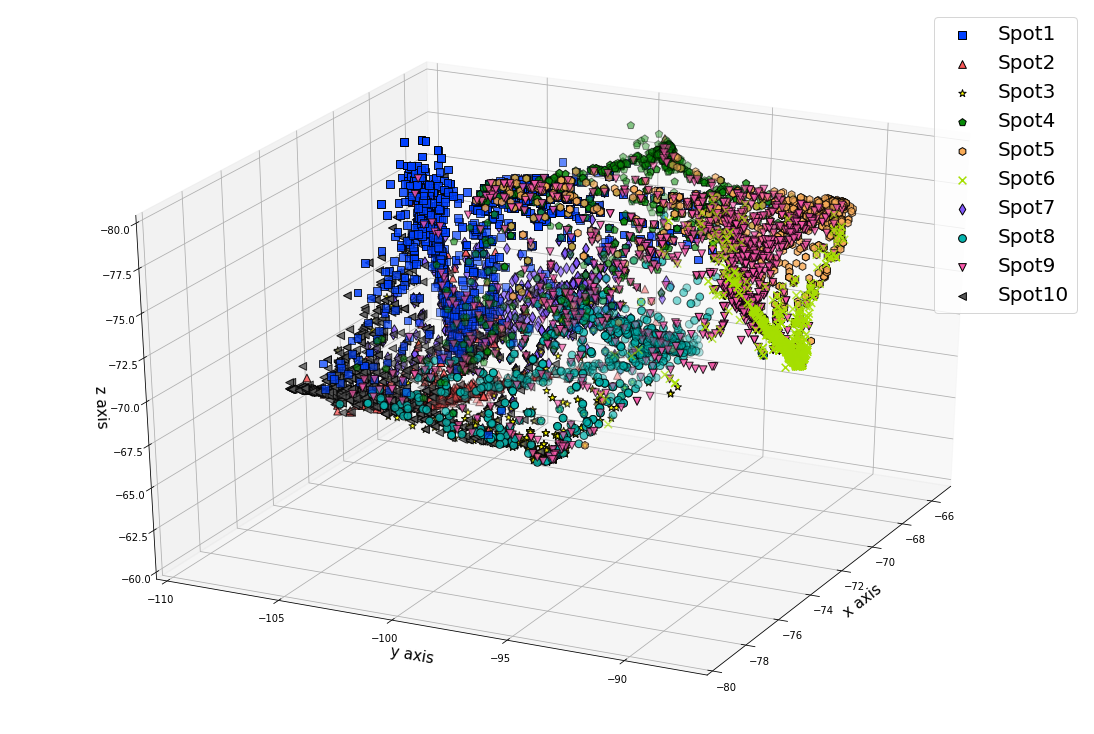

In [10]:
import numpy as np

def divide_area_value(x_data, set_num):
    area = {1:[], 2:[], 3:[], 4:[], 5:[], 6:[], 7:[], 8:[], 9:[], 10:[]}
    for num in range(0, 10):
        begin = num * set_num
        end = (num + 1) * set_num
        area[num + 1] = x_data[begin:end, 0:3]
        
    return area

def convert_array_into_list(data):
    for num in range(1, 11):
        data[num] = data[num].tolist()
        
    return data

def convert_array_into_transpose(data, set_num):
    d1 = data[0:set_num,[0]].T[0]
    d2 = data[0:set_num,[1]].T[0]
    d3 = data[0:set_num,[2]].T[0]
    data_list = [d1, d2, d3]
    
    return data_list

after_autoencoder_x_test = autoencoder_01.predict(ae_x_in_test_noisy) * (-100)

x = after_autoencoder_x_test
y = x_in_test_denoised[:,[0]].T[0]

area = divide_area_value(x, test_set_num)

area1 = convert_array_into_transpose(area[1], test_set_num)
area2 = convert_array_into_transpose(area[2], test_set_num)
area3 = convert_array_into_transpose(area[3], test_set_num)
area4 = convert_array_into_transpose(area[4], test_set_num)
area5 = convert_array_into_transpose(area[5], test_set_num)
area6 = convert_array_into_transpose(area[6], test_set_num)
area7 = convert_array_into_transpose(area[7], test_set_num)
area8 = convert_array_into_transpose(area[8], test_set_num)
area9 = convert_array_into_transpose(area[9], test_set_num)
area10 = convert_array_into_transpose(area[10], test_set_num)

from mpl_toolkits.mplot3d import Axes3D, axes3d
import matplotlib.pyplot as plt
import mglearn

fig = plt.figure(figsize=(15,10))
ax = Axes3D(fig, elev=-152, azim=-26)

area_name = ['Spot1','Spot2','Spot3','Spot4','Spot5','Spot6','Spot7', 'Spot8',
            'Spot9', 'Spot10']
color = ['#0040FF','#FA5858','#FFFF00','#088A08','#FAAC58','#A5DF00','#8258FA', '#04B4AE', '#FA58AC',
        '#585858']
marker = ['s', '^', '*', 'p', 'h', 'x', 'd', 'o', 'v', '<']
size = 60

ax.scatter(area1[0], area1[1], area1[2], label=area_name[0], c=color[0], marker=marker[0], cmap=mglearn.cm2, s=size, edgecolor='k')
ax.scatter(area2[0], area2[1], area2[2], label=area_name[1], c=color[1], marker=marker[1], cmap=mglearn.cm2, s=size, edgecolor='k')
ax.scatter(area3[0], area3[1], area3[2], label=area_name[2], c=color[2], marker=marker[2], cmap=mglearn.cm2, s=size, edgecolor='k')
ax.scatter(area4[0], area4[1], area4[2], label=area_name[3], c=color[3], marker=marker[3], cmap=mglearn.cm2, s=size, edgecolor='k')
ax.scatter(area5[0], area5[1], area5[2], label=area_name[4], c=color[4], marker=marker[4], cmap=mglearn.cm2, s=size, edgecolor='k')
ax.scatter(area6[0], area6[1], area6[2], label=area_name[5], c=color[5], marker=marker[5], cmap=mglearn.cm2, s=size, edgecolor='k')
ax.scatter(area7[0], area7[1], area7[2], label=area_name[6], c=color[6], marker=marker[6], cmap=mglearn.cm2, s=size, edgecolor='k')
ax.scatter(area8[0], area8[1], area8[2], label=area_name[7], c=color[7], marker=marker[7], cmap=mglearn.cm2, s=size, edgecolor='k')
ax.scatter(area9[0], area9[1], area9[2], label=area_name[8], c=color[8], marker=marker[8], cmap=mglearn.cm2, s=size, edgecolor='k')
ax.scatter(area10[0], area10[1], area10[2], label=area_name[9], c=color[9], marker=marker[9], cmap=mglearn.cm2, s=size, edgecolor='k')

params = {'legend.fontsize': 20,
          'legend.handlelength': 2,}

plt.rcParams.update(params)

ax.set_xlabel('x axis', fontsize=15)
ax.set_ylabel('y axis', fontsize=15)
ax.set_zlabel('z axis', fontsize=15)

ax.set_xlim((-80, -65))
ax.set_ylim((-110, -87))
ax.set_zlim((-80, -60))

ax.legend()

#File Saving
file_name = "autoencoder_01.svg"
plt.savefig(file_name)

plt.show()

## Autoencoder - Denoising (Car out)

## Description
- Autoencoder
    - Car out (noisy) 입력
    - Car out (filtered) 정답

In [11]:
# create autoencoder
# autoencoder_02 : Denoising (Car out)
autoencoder_02 = Model(input_rssi, decoded)
autoencoder_02.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder_02.fit(ae_x_out_train_noisy, ae_x_out_train_denoised,
                epochs=1000,
                batch_size=256,
                shuffle=True,
                validation_data=(ae_x_out_test_noisy, ae_x_out_test_denoised))

Train on 45000 samples, validate on 15000 samples
Epoch 1/1000
45000/45000 [==============================] - 1s 16us/step - loss: 0.4059 - val_loss: 0.4049
Epoch 2/1000
45000/45000 [==============================] - 0s 10us/step - loss: 0.4048 - val_loss: 0.4047
Epoch 3/1000
45000/45000 [==============================] - 0s 10us/step - loss: 0.4046 - val_loss: 0.4047
Epoch 4/1000
45000/45000 [==============================] - 0s 11us/step - loss: 0.4046 - val_loss: 0.4046
Epoch 5/1000
45000/45000 [==============================] - 0s 10us/step - loss: 0.4045 - val_loss: 0.4047
Epoch 6/1000
45000/45000 [==============================] - 0s 10us/step - loss: 0.4045 - val_loss: 0.4047
Epoch 7/1000
45000/45000 [==============================] - 0s 10us/step - loss: 0.4045 - val_loss: 0.4045
Epoch 8/1000
45000/45000 [==============================] - 0s 10us/step - loss: 0.4045 - val_loss: 0.4046
Epoch 9/1000
45000/45000 [==============================] - 0s 11us/step - loss: 0.4044 - val_

45000/45000 [==============================] - 1s 11us/step - loss: 0.4043 - val_loss: 0.4044
Epoch 152/1000
45000/45000 [==============================] - 1s 11us/step - loss: 0.4043 - val_loss: 0.4044
Epoch 153/1000
45000/45000 [==============================] - 1s 11us/step - loss: 0.4043 - val_loss: 0.4044
Epoch 154/1000
45000/45000 [==============================] - 1s 12us/step - loss: 0.4043 - val_loss: 0.4044
Epoch 155/1000
45000/45000 [==============================] - 0s 11us/step - loss: 0.4043 - val_loss: 0.4044
Epoch 156/1000
45000/45000 [==============================] - 1s 12us/step - loss: 0.4043 - val_loss: 0.4044
Epoch 157/1000
45000/45000 [==============================] - 1s 11us/step - loss: 0.4043 - val_loss: 0.4044
Epoch 158/1000
45000/45000 [==============================] - 1s 11us/step - loss: 0.4043 - val_loss: 0.4044
Epoch 159/1000
45000/45000 [==============================] - 1s 11us/step - loss: 0.4043 - val_loss: 0.4044
Epoch 160/1000
45000/45000 [======

45000/45000 [==============================] - 0s 11us/step - loss: 0.4043 - val_loss: 0.4044
Epoch 302/1000
45000/45000 [==============================] - 0s 11us/step - loss: 0.4043 - val_loss: 0.4044
Epoch 303/1000
45000/45000 [==============================] - 0s 11us/step - loss: 0.4043 - val_loss: 0.4044
Epoch 304/1000
45000/45000 [==============================] - 0s 10us/step - loss: 0.4043 - val_loss: 0.4044
Epoch 305/1000
45000/45000 [==============================] - 0s 11us/step - loss: 0.4043 - val_loss: 0.4044
Epoch 306/1000
45000/45000 [==============================] - 0s 10us/step - loss: 0.4043 - val_loss: 0.4044
Epoch 307/1000
45000/45000 [==============================] - 0s 11us/step - loss: 0.4043 - val_loss: 0.4044
Epoch 308/1000
45000/45000 [==============================] - 0s 10us/step - loss: 0.4043 - val_loss: 0.4044
Epoch 309/1000
45000/45000 [==============================] - 0s 10us/step - loss: 0.4043 - val_loss: 0.4044
Epoch 310/1000
45000/45000 [======

45000/45000 [==============================] - 0s 11us/step - loss: 0.4043 - val_loss: 0.4044
Epoch 452/1000
45000/45000 [==============================] - 1s 11us/step - loss: 0.4043 - val_loss: 0.4044
Epoch 453/1000
45000/45000 [==============================] - 1s 11us/step - loss: 0.4043 - val_loss: 0.4044
Epoch 454/1000
45000/45000 [==============================] - 1s 11us/step - loss: 0.4043 - val_loss: 0.4044
Epoch 455/1000
45000/45000 [==============================] - 0s 11us/step - loss: 0.4043 - val_loss: 0.4044
Epoch 456/1000
45000/45000 [==============================] - 1s 11us/step - loss: 0.4043 - val_loss: 0.4044
Epoch 457/1000
45000/45000 [==============================] - 1s 11us/step - loss: 0.4043 - val_loss: 0.4044
Epoch 458/1000
45000/45000 [==============================] - 1s 11us/step - loss: 0.4043 - val_loss: 0.4044
Epoch 459/1000
45000/45000 [==============================] - 1s 11us/step - loss: 0.4043 - val_loss: 0.4044
Epoch 460/1000
45000/45000 [======

45000/45000 [==============================] - 0s 11us/step - loss: 0.4043 - val_loss: 0.4044
Epoch 602/1000
45000/45000 [==============================] - 0s 10us/step - loss: 0.4043 - val_loss: 0.4044
Epoch 603/1000
45000/45000 [==============================] - 0s 11us/step - loss: 0.4043 - val_loss: 0.4044
Epoch 604/1000
45000/45000 [==============================] - 0s 10us/step - loss: 0.4043 - val_loss: 0.4044
Epoch 605/1000
45000/45000 [==============================] - 0s 11us/step - loss: 0.4043 - val_loss: 0.4044
Epoch 606/1000
45000/45000 [==============================] - 0s 10us/step - loss: 0.4043 - val_loss: 0.4044
Epoch 607/1000
45000/45000 [==============================] - 0s 10us/step - loss: 0.4043 - val_loss: 0.4044
Epoch 608/1000
45000/45000 [==============================] - 0s 10us/step - loss: 0.4043 - val_loss: 0.4044
Epoch 609/1000
45000/45000 [==============================] - 0s 11us/step - loss: 0.4043 - val_loss: 0.4044
Epoch 610/1000
45000/45000 [======

45000/45000 [==============================] - 0s 11us/step - loss: 0.4043 - val_loss: 0.4044
Epoch 752/1000
45000/45000 [==============================] - 0s 11us/step - loss: 0.4043 - val_loss: 0.4044
Epoch 753/1000
45000/45000 [==============================] - 0s 11us/step - loss: 0.4043 - val_loss: 0.4044
Epoch 754/1000
45000/45000 [==============================] - 1s 11us/step - loss: 0.4043 - val_loss: 0.4044
Epoch 755/1000
45000/45000 [==============================] - 0s 11us/step - loss: 0.4043 - val_loss: 0.4044
Epoch 756/1000
45000/45000 [==============================] - 1s 11us/step - loss: 0.4043 - val_loss: 0.4044
Epoch 757/1000
45000/45000 [==============================] - 0s 11us/step - loss: 0.4043 - val_loss: 0.4044
Epoch 758/1000
45000/45000 [==============================] - 1s 11us/step - loss: 0.4043 - val_loss: 0.4044
Epoch 759/1000
45000/45000 [==============================] - 1s 11us/step - loss: 0.4043 - val_loss: 0.4044
Epoch 760/1000
45000/45000 [======

45000/45000 [==============================] - 0s 11us/step - loss: 0.4043 - val_loss: 0.4044
Epoch 902/1000
45000/45000 [==============================] - 0s 11us/step - loss: 0.4043 - val_loss: 0.4044
Epoch 903/1000
45000/45000 [==============================] - 0s 10us/step - loss: 0.4043 - val_loss: 0.4044
Epoch 904/1000
45000/45000 [==============================] - 0s 10us/step - loss: 0.4043 - val_loss: 0.4044
Epoch 905/1000
45000/45000 [==============================] - 0s 10us/step - loss: 0.4043 - val_loss: 0.4044
Epoch 906/1000
45000/45000 [==============================] - 0s 11us/step - loss: 0.4043 - val_loss: 0.4044
Epoch 907/1000
45000/45000 [==============================] - 0s 11us/step - loss: 0.4043 - val_loss: 0.4044
Epoch 908/1000
45000/45000 [==============================] - 0s 10us/step - loss: 0.4043 - val_loss: 0.4044
Epoch 909/1000
45000/45000 [==============================] - 0s 10us/step - loss: 0.4043 - val_loss: 0.4044
Epoch 910/1000
45000/45000 [======

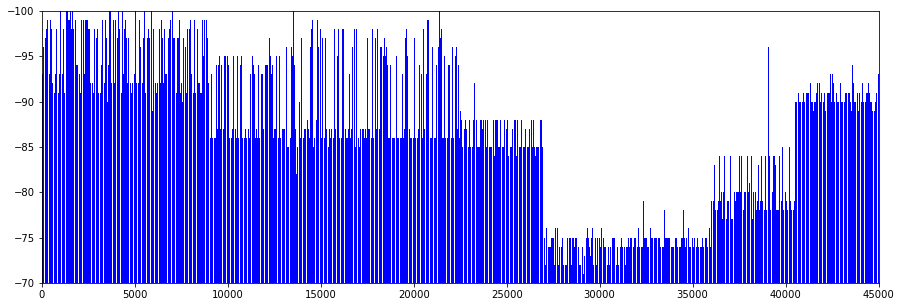

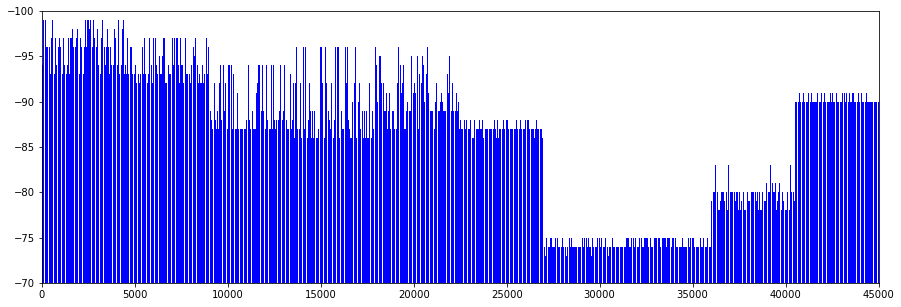

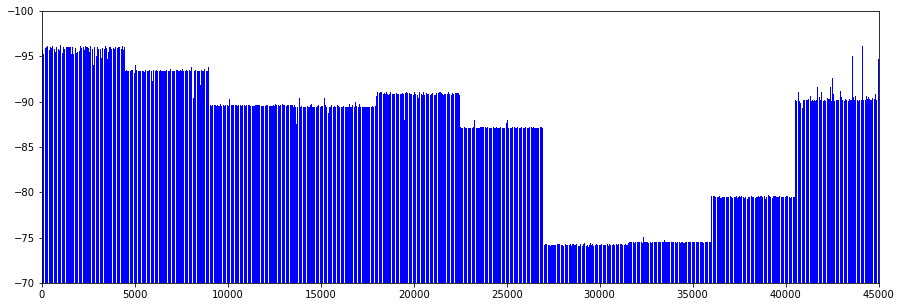

In [12]:
begin = -70
end = -100

y = x_out_train_noisy[:,[0]].T[0]
make_plot(y, train_set_num * 10, begin, end)

y = x_out_train_denoised[:,[0]].T[0]
make_plot(y, train_set_num * 10, begin, end)

after_autoencoder_x_train = autoencoder_02.predict(ae_x_out_train_noisy) * (-100)
make_plot(after_autoencoder_x_train[:, [0]].T[0], train_set_num * 10, begin, end)

In [13]:
autoencoder_02.save('autoencoder_02.h5')

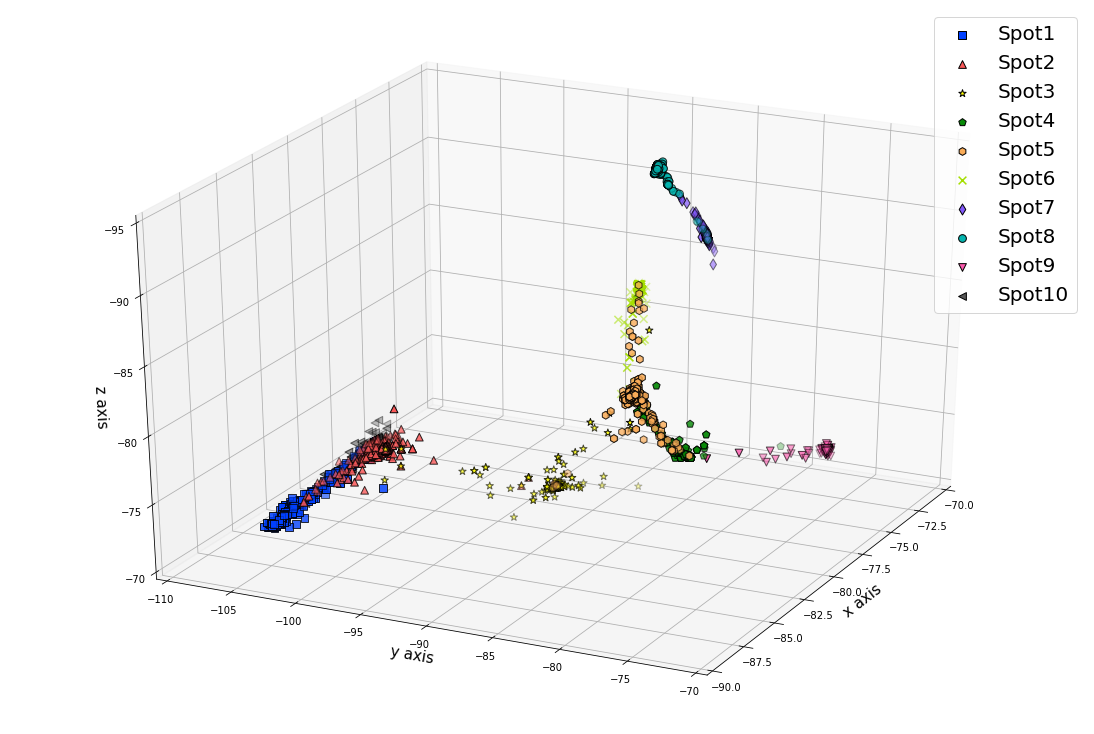

In [14]:
import numpy as np

def divide_area_value(x_data, set_num):
    area = {1:[], 2:[], 3:[], 4:[], 5:[], 6:[], 7:[], 8:[], 9:[], 10:[]}
    for num in range(0, 10):
        begin = num * set_num
        end = (num + 1) * set_num
        area[num + 1] = x_data[begin:end, 0:3]
        
    return area

def convert_array_into_list(data):
    for num in range(1, 11):
        data[num] = data[num].tolist()
        
    return data

def convert_array_into_transpose(data, set_num):
    d1 = data[0:set_num,[0]].T[0]
    d2 = data[0:set_num,[1]].T[0]
    d3 = data[0:set_num,[2]].T[0]
    data_list = [d1, d2, d3]
    
    return data_list

after_autoencoder_x_test = autoencoder_02.predict(ae_x_out_test_noisy) * (-100)

x = after_autoencoder_x_test
y = x_out_test_denoised[:,[0]].T[0]

area = divide_area_value(x, test_set_num)

area1 = convert_array_into_transpose(area[1], test_set_num)
area2 = convert_array_into_transpose(area[2], test_set_num)
area3 = convert_array_into_transpose(area[3], test_set_num)
area4 = convert_array_into_transpose(area[4], test_set_num)
area5 = convert_array_into_transpose(area[5], test_set_num)
area6 = convert_array_into_transpose(area[6], test_set_num)
area7 = convert_array_into_transpose(area[7], test_set_num)
area8 = convert_array_into_transpose(area[8], test_set_num)
area9 = convert_array_into_transpose(area[9], test_set_num)
area10 = convert_array_into_transpose(area[10], test_set_num)

from mpl_toolkits.mplot3d import Axes3D, axes3d
import matplotlib.pyplot as plt
import mglearn

fig = plt.figure(figsize=(15,10))
ax = Axes3D(fig, elev=-152, azim=-26)

area_name = ['Spot1','Spot2','Spot3','Spot4','Spot5','Spot6','Spot7', 'Spot8',
            'Spot9', 'Spot10']
color = ['#0040FF','#FA5858','#FFFF00','#088A08','#FAAC58','#A5DF00','#8258FA', '#04B4AE', '#FA58AC',
        '#585858']
marker = ['s', '^', '*', 'p', 'h', 'x', 'd', 'o', 'v', '<']
size = 60

ax.scatter(area1[0], area1[1], area1[2], label=area_name[0], c=color[0], marker=marker[0], cmap=mglearn.cm2, s=size, edgecolor='k')
ax.scatter(area2[0], area2[1], area2[2], label=area_name[1], c=color[1], marker=marker[1], cmap=mglearn.cm2, s=size, edgecolor='k')
ax.scatter(area3[0], area3[1], area3[2], label=area_name[2], c=color[2], marker=marker[2], cmap=mglearn.cm2, s=size, edgecolor='k')
ax.scatter(area4[0], area4[1], area4[2], label=area_name[3], c=color[3], marker=marker[3], cmap=mglearn.cm2, s=size, edgecolor='k')
ax.scatter(area5[0], area5[1], area5[2], label=area_name[4], c=color[4], marker=marker[4], cmap=mglearn.cm2, s=size, edgecolor='k')
ax.scatter(area6[0], area6[1], area6[2], label=area_name[5], c=color[5], marker=marker[5], cmap=mglearn.cm2, s=size, edgecolor='k')
ax.scatter(area7[0], area7[1], area7[2], label=area_name[6], c=color[6], marker=marker[6], cmap=mglearn.cm2, s=size, edgecolor='k')
ax.scatter(area8[0], area8[1], area8[2], label=area_name[7], c=color[7], marker=marker[7], cmap=mglearn.cm2, s=size, edgecolor='k')
ax.scatter(area9[0], area9[1], area9[2], label=area_name[8], c=color[8], marker=marker[8], cmap=mglearn.cm2, s=size, edgecolor='k')
ax.scatter(area10[0], area10[1], area10[2], label=area_name[9], c=color[9], marker=marker[9], cmap=mglearn.cm2, s=size, edgecolor='k')

params = {'legend.fontsize': 20,
          'legend.handlelength': 2,}

plt.rcParams.update(params)

ax.set_xlabel('x axis', fontsize=15)
ax.set_ylabel('y axis', fontsize=15)
ax.set_zlabel('z axis', fontsize=15)

ax.set_xlim((-90, -70))
ax.set_ylim((-110, -70))
ax.set_zlim((-95, -70))

ax.legend()

#File Saving
file_name = "autoencoder_02.svg"
plt.savefig(file_name)

plt.show()

## Autoencoder - Converting

## Description
- Autoencoder
    - Car in (noisy)를 Autoencoder에 넣은 결과 Car in (denoised)
    - Car in (denoised) 입력
    - Car out (filtered) 정답

In [15]:
# create autoencoder
# autoencoder_03 : Converting
autoencoder_03 = Model(input_rssi, decoded)
autoencoder_03.compile(optimizer='adadelta', loss='binary_crossentropy')

after_autoencoder_x_train = autoencoder_01.predict(ae_x_in_train_noisy) * (-100)
after_autoencoder_x_test = autoencoder_01.predict(ae_x_in_test_noisy) * (-100)

autoencoder_03.fit(after_autoencoder_x_train, ae_x_out_train_denoised,
                epochs=1000,
                batch_size=256,
                shuffle=True,
                validation_data=(after_autoencoder_x_test, ae_x_out_test_denoised))

Train on 45000 samples, validate on 15000 samples
Epoch 1/1000
45000/45000 [==============================] - 1s 17us/step - loss: 0.4583 - val_loss: 0.4259
Epoch 2/1000
45000/45000 [==============================] - 0s 11us/step - loss: 0.4220 - val_loss: 0.4198
Epoch 3/1000
45000/45000 [==============================] - 1s 11us/step - loss: 0.4206 - val_loss: 0.4222
Epoch 4/1000
45000/45000 [==============================] - 1s 11us/step - loss: 0.4199 - val_loss: 0.4193
Epoch 5/1000
45000/45000 [==============================] - 0s 11us/step - loss: 0.4194 - val_loss: 0.4188
Epoch 6/1000
45000/45000 [==============================] - 0s 11us/step - loss: 0.4193 - val_loss: 0.4184
Epoch 7/1000
45000/45000 [==============================] - 0s 10us/step - loss: 0.4188 - val_loss: 0.4184
Epoch 8/1000
45000/45000 [==============================] - 0s 10us/step - loss: 0.4187 - val_loss: 0.4188
Epoch 9/1000
45000/45000 [==============================] - 0s 10us/step - loss: 0.4186 - val_

45000/45000 [==============================] - 1s 12us/step - loss: 0.4153 - val_loss: 0.4177
Epoch 152/1000
45000/45000 [==============================] - 1s 12us/step - loss: 0.4153 - val_loss: 0.4149
Epoch 153/1000
45000/45000 [==============================] - 1s 12us/step - loss: 0.4153 - val_loss: 0.4150
Epoch 154/1000
45000/45000 [==============================] - 1s 13us/step - loss: 0.4153 - val_loss: 0.4155
Epoch 155/1000
45000/45000 [==============================] - 1s 12us/step - loss: 0.4153 - val_loss: 0.4156
Epoch 156/1000
45000/45000 [==============================] - 1s 12us/step - loss: 0.4153 - val_loss: 0.4158
Epoch 157/1000
45000/45000 [==============================] - 1s 12us/step - loss: 0.4153 - val_loss: 0.4151
Epoch 158/1000
45000/45000 [==============================] - 1s 12us/step - loss: 0.4153 - val_loss: 0.4154
Epoch 159/1000
45000/45000 [==============================] - 1s 13us/step - loss: 0.4153 - val_loss: 0.4149
Epoch 160/1000
45000/45000 [======

45000/45000 [==============================] - 0s 11us/step - loss: 0.4150 - val_loss: 0.4163
Epoch 302/1000
45000/45000 [==============================] - 0s 11us/step - loss: 0.4150 - val_loss: 0.4145
Epoch 303/1000
45000/45000 [==============================] - 0s 10us/step - loss: 0.4150 - val_loss: 0.4151
Epoch 304/1000
45000/45000 [==============================] - 0s 11us/step - loss: 0.4149 - val_loss: 0.4152
Epoch 305/1000
45000/45000 [==============================] - 0s 11us/step - loss: 0.4150 - val_loss: 0.4153
Epoch 306/1000
45000/45000 [==============================] - 0s 10us/step - loss: 0.4149 - val_loss: 0.4146
Epoch 307/1000
45000/45000 [==============================] - 0s 10us/step - loss: 0.4149 - val_loss: 0.4156
Epoch 308/1000
45000/45000 [==============================] - 0s 10us/step - loss: 0.4150 - val_loss: 0.4159
Epoch 309/1000
45000/45000 [==============================] - 0s 10us/step - loss: 0.4150 - val_loss: 0.4146
Epoch 310/1000
45000/45000 [======

45000/45000 [==============================] - 1s 12us/step - loss: 0.4148 - val_loss: 0.4156
Epoch 452/1000
45000/45000 [==============================] - 1s 12us/step - loss: 0.4149 - val_loss: 0.4151
Epoch 453/1000
45000/45000 [==============================] - 1s 13us/step - loss: 0.4148 - val_loss: 0.4147
Epoch 454/1000
45000/45000 [==============================] - 1s 12us/step - loss: 0.4149 - val_loss: 0.4151
Epoch 455/1000
45000/45000 [==============================] - 1s 13us/step - loss: 0.4149 - val_loss: 0.4146
Epoch 456/1000
45000/45000 [==============================] - 1s 13us/step - loss: 0.4148 - val_loss: 0.4157
Epoch 457/1000
45000/45000 [==============================] - 1s 12us/step - loss: 0.4150 - val_loss: 0.4145
Epoch 458/1000
45000/45000 [==============================] - 1s 13us/step - loss: 0.4149 - val_loss: 0.4144
Epoch 459/1000
45000/45000 [==============================] - 1s 13us/step - loss: 0.4148 - val_loss: 0.4146
Epoch 460/1000
45000/45000 [======

45000/45000 [==============================] - 0s 11us/step - loss: 0.4147 - val_loss: 0.4157
Epoch 602/1000
45000/45000 [==============================] - 0s 10us/step - loss: 0.4147 - val_loss: 0.4142
Epoch 603/1000
45000/45000 [==============================] - 0s 11us/step - loss: 0.4148 - val_loss: 0.4144
Epoch 604/1000
45000/45000 [==============================] - 0s 10us/step - loss: 0.4147 - val_loss: 0.4153
Epoch 605/1000
45000/45000 [==============================] - 0s 10us/step - loss: 0.4147 - val_loss: 0.4154
Epoch 606/1000
45000/45000 [==============================] - 0s 10us/step - loss: 0.4147 - val_loss: 0.4145
Epoch 607/1000
45000/45000 [==============================] - 1s 11us/step - loss: 0.4147 - val_loss: 0.4142
Epoch 608/1000
45000/45000 [==============================] - 1s 11us/step - loss: 0.4148 - val_loss: 0.4154
Epoch 609/1000
45000/45000 [==============================] - 0s 11us/step - loss: 0.4147 - val_loss: 0.4151
Epoch 610/1000
45000/45000 [======

45000/45000 [==============================] - 1s 14us/step - loss: 0.4146 - val_loss: 0.4161
Epoch 752/1000
45000/45000 [==============================] - 1s 14us/step - loss: 0.4146 - val_loss: 0.4142
Epoch 753/1000
45000/45000 [==============================] - 1s 14us/step - loss: 0.4147 - val_loss: 0.4143
Epoch 754/1000
45000/45000 [==============================] - 1s 14us/step - loss: 0.4146 - val_loss: 0.4146
Epoch 755/1000
45000/45000 [==============================] - 1s 14us/step - loss: 0.4147 - val_loss: 0.4146
Epoch 756/1000
45000/45000 [==============================] - 1s 14us/step - loss: 0.4147 - val_loss: 0.4147
Epoch 757/1000
45000/45000 [==============================] - 1s 14us/step - loss: 0.4147 - val_loss: 0.4151
Epoch 758/1000
45000/45000 [==============================] - 1s 14us/step - loss: 0.4147 - val_loss: 0.4141
Epoch 759/1000
45000/45000 [==============================] - 1s 15us/step - loss: 0.4146 - val_loss: 0.4145
Epoch 760/1000
45000/45000 [======

45000/45000 [==============================] - 0s 11us/step - loss: 0.4146 - val_loss: 0.4162
Epoch 902/1000
45000/45000 [==============================] - 0s 10us/step - loss: 0.4146 - val_loss: 0.4160
Epoch 903/1000
45000/45000 [==============================] - 0s 10us/step - loss: 0.4147 - val_loss: 0.4146
Epoch 904/1000
45000/45000 [==============================] - 0s 11us/step - loss: 0.4146 - val_loss: 0.4141
Epoch 905/1000
45000/45000 [==============================] - 0s 10us/step - loss: 0.4146 - val_loss: 0.4151
Epoch 906/1000
45000/45000 [==============================] - 0s 10us/step - loss: 0.4146 - val_loss: 0.4142
Epoch 907/1000
45000/45000 [==============================] - 0s 10us/step - loss: 0.4146 - val_loss: 0.4142
Epoch 908/1000
45000/45000 [==============================] - 0s 10us/step - loss: 0.4146 - val_loss: 0.4144
Epoch 909/1000
45000/45000 [==============================] - 0s 10us/step - loss: 0.4147 - val_loss: 0.4155
Epoch 910/1000
45000/45000 [======

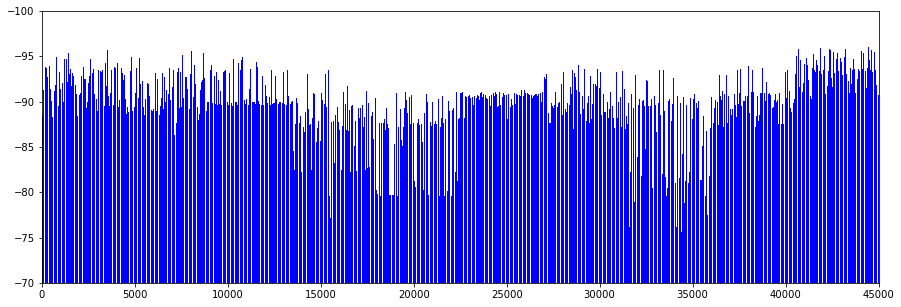

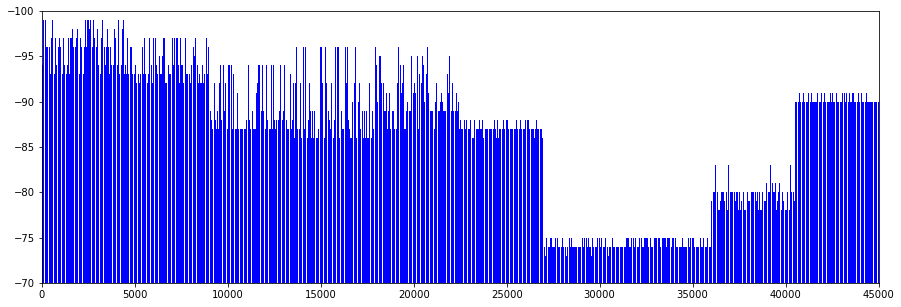

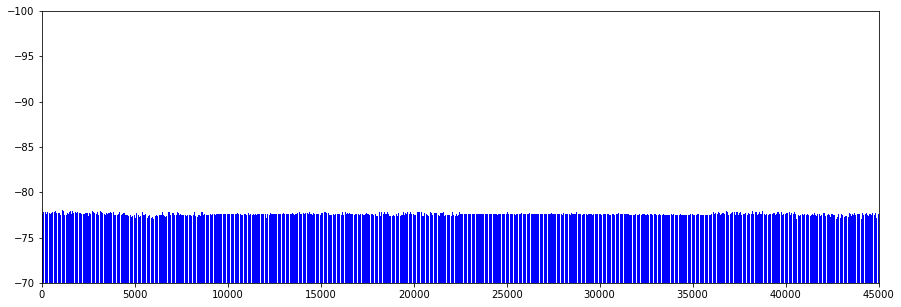

In [16]:
begin = -70
end = -100

y = after_autoencoder_x_train[:,[0]].T[0]
make_plot(y, train_set_num * 10, begin, end)

y = x_out_train_denoised[:,[0]].T[0]
make_plot(y, train_set_num * 10, begin, end)

after_autoencoder_x_train = autoencoder_01.predict(ae_x_in_train_noisy)
after_autoencoder_x_train = autoencoder_03.predict(after_autoencoder_x_train) * (-100)
make_plot(after_autoencoder_x_train[:, [0]].T[0], train_set_num * 10, begin, end)

In [17]:
autoencoder_03.save('autoencoder_03.h5')

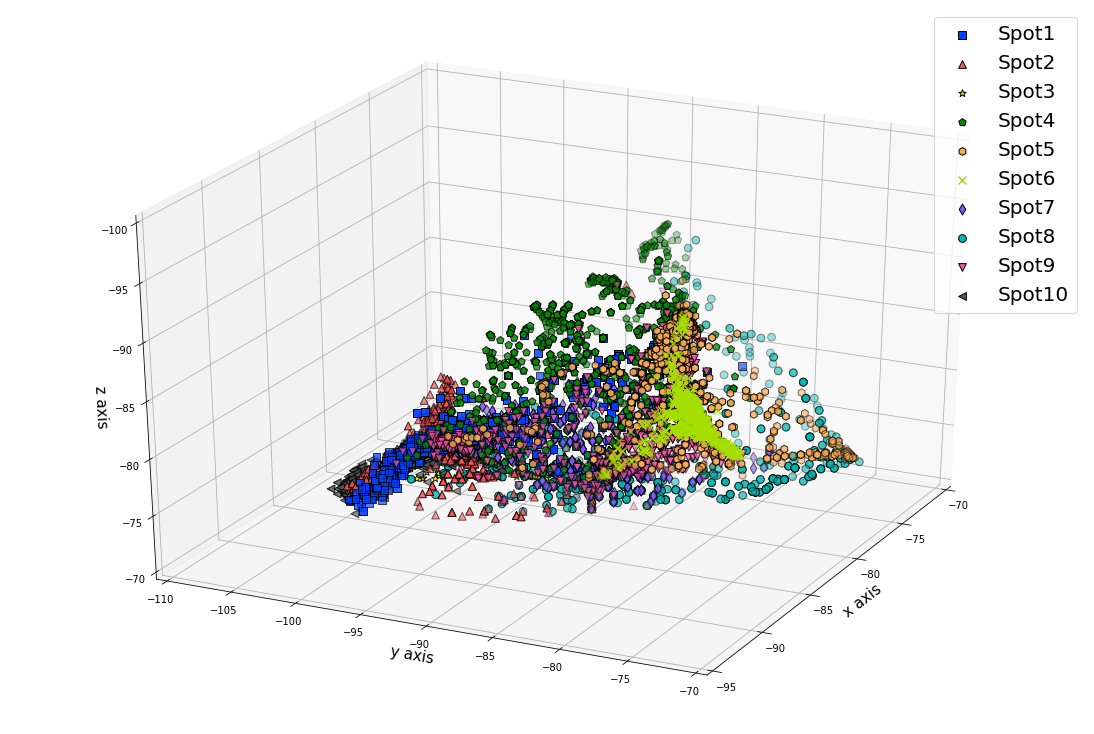

In [18]:
import numpy as np

def divide_area_value(x_data, set_num):
    area = {1:[], 2:[], 3:[], 4:[], 5:[], 6:[], 7:[], 8:[], 9:[], 10:[]}
    for num in range(0, 10):
        begin = num * set_num
        end = (num + 1) * set_num
        area[num + 1] = x_data[begin:end, 0:3]
        
    return area

def convert_array_into_list(data):
    for num in range(1, 11):
        data[num] = data[num].tolist()
        
    return data

def convert_array_into_transpose(data, set_num):
    d1 = data[0:set_num,[0]].T[0]
    d2 = data[0:set_num,[1]].T[0]
    d3 = data[0:set_num,[2]].T[0]
    data_list = [d1, d2, d3]
    
    return data_list

x = after_autoencoder_x_test
y = x_out_test_denoised[:,[0]].T[0]

area = divide_area_value(x, test_set_num)

area1 = convert_array_into_transpose(area[1], test_set_num)
area2 = convert_array_into_transpose(area[2], test_set_num)
area3 = convert_array_into_transpose(area[3], test_set_num)
area4 = convert_array_into_transpose(area[4], test_set_num)
area5 = convert_array_into_transpose(area[5], test_set_num)
area6 = convert_array_into_transpose(area[6], test_set_num)
area7 = convert_array_into_transpose(area[7], test_set_num)
area8 = convert_array_into_transpose(area[8], test_set_num)
area9 = convert_array_into_transpose(area[9], test_set_num)
area10 = convert_array_into_transpose(area[10], test_set_num)

from mpl_toolkits.mplot3d import Axes3D, axes3d
import matplotlib.pyplot as plt
import mglearn

fig = plt.figure(figsize=(15,10))
ax = Axes3D(fig, elev=-152, azim=-26)

area_name = ['Spot1','Spot2','Spot3','Spot4','Spot5','Spot6','Spot7', 'Spot8',
            'Spot9', 'Spot10']
color = ['#0040FF','#FA5858','#FFFF00','#088A08','#FAAC58','#A5DF00','#8258FA', '#04B4AE', '#FA58AC',
        '#585858']
marker = ['s', '^', '*', 'p', 'h', 'x', 'd', 'o', 'v', '<']
size = 60

ax.scatter(area1[0], area1[1], area1[2], label=area_name[0], c=color[0], marker=marker[0], cmap=mglearn.cm2, s=size, edgecolor='k')
ax.scatter(area2[0], area2[1], area2[2], label=area_name[1], c=color[1], marker=marker[1], cmap=mglearn.cm2, s=size, edgecolor='k')
ax.scatter(area3[0], area3[1], area3[2], label=area_name[2], c=color[2], marker=marker[2], cmap=mglearn.cm2, s=size, edgecolor='k')
ax.scatter(area4[0], area4[1], area4[2], label=area_name[3], c=color[3], marker=marker[3], cmap=mglearn.cm2, s=size, edgecolor='k')
ax.scatter(area5[0], area5[1], area5[2], label=area_name[4], c=color[4], marker=marker[4], cmap=mglearn.cm2, s=size, edgecolor='k')
ax.scatter(area6[0], area6[1], area6[2], label=area_name[5], c=color[5], marker=marker[5], cmap=mglearn.cm2, s=size, edgecolor='k')
ax.scatter(area7[0], area7[1], area7[2], label=area_name[6], c=color[6], marker=marker[6], cmap=mglearn.cm2, s=size, edgecolor='k')
ax.scatter(area8[0], area8[1], area8[2], label=area_name[7], c=color[7], marker=marker[7], cmap=mglearn.cm2, s=size, edgecolor='k')
ax.scatter(area9[0], area9[1], area9[2], label=area_name[8], c=color[8], marker=marker[8], cmap=mglearn.cm2, s=size, edgecolor='k')
ax.scatter(area10[0], area10[1], area10[2], label=area_name[9], c=color[9], marker=marker[9], cmap=mglearn.cm2, s=size, edgecolor='k')

params = {'legend.fontsize': 20,
          'legend.handlelength': 2,}

plt.rcParams.update(params)

ax.set_xlabel('x axis', fontsize=15)
ax.set_ylabel('y axis', fontsize=15)
ax.set_zlabel('z axis', fontsize=15)

ax.set_xlim((-95, -70))
ax.set_ylim((-110, -70))
ax.set_zlim((-100, -70))

ax.legend()

#File Saving
file_name = "autoencoder_03.svg"
plt.savefig(file_name)

plt.show()

## Autoencoder - Converting

## Description
- Autoencoder
    - Car in (filtered) 입력
    - Car out (filtered) 정답

In [19]:
# create autoencoder
# autoencoder_04 : Converting
autoencoder_04 = Model(input_rssi, decoded)
autoencoder_04.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder_04.fit(ae_x_in_train_denoised, ae_x_out_train_denoised,
                epochs=1000,
                batch_size=256,
                shuffle=True,
                validation_data=(ae_x_in_test_denoised, ae_x_out_test_denoised))

Train on 45000 samples, validate on 15000 samples
Epoch 1/1000
45000/45000 [==============================] - 1s 17us/step - loss: 0.4177 - val_loss: 0.4139
Epoch 2/1000
45000/45000 [==============================] - 0s 11us/step - loss: 0.4133 - val_loss: 0.4155
Epoch 3/1000
45000/45000 [==============================] - 0s 11us/step - loss: 0.4110 - val_loss: 0.4101
Epoch 4/1000
45000/45000 [==============================] - 0s 11us/step - loss: 0.4099 - val_loss: 0.4089
Epoch 5/1000
45000/45000 [==============================] - 0s 11us/step - loss: 0.4090 - val_loss: 0.4078
Epoch 6/1000
45000/45000 [==============================] - 0s 11us/step - loss: 0.4082 - val_loss: 0.4096
Epoch 7/1000
45000/45000 [==============================] - 0s 11us/step - loss: 0.4079 - val_loss: 0.4087
Epoch 8/1000
45000/45000 [==============================] - 0s 11us/step - loss: 0.4073 - val_loss: 0.4072
Epoch 9/1000
45000/45000 [==============================] - 0s 11us/step - loss: 0.4073 - val_

45000/45000 [==============================] - 1s 13us/step - loss: 0.4059 - val_loss: 0.4066
Epoch 152/1000
45000/45000 [==============================] - 1s 13us/step - loss: 0.4059 - val_loss: 0.4060
Epoch 153/1000
45000/45000 [==============================] - 1s 13us/step - loss: 0.4058 - val_loss: 0.4060
Epoch 154/1000
45000/45000 [==============================] - 1s 13us/step - loss: 0.4059 - val_loss: 0.4071
Epoch 155/1000
45000/45000 [==============================] - 1s 13us/step - loss: 0.4059 - val_loss: 0.4066
Epoch 156/1000
45000/45000 [==============================] - 1s 13us/step - loss: 0.4059 - val_loss: 0.4057
Epoch 157/1000
45000/45000 [==============================] - 1s 13us/step - loss: 0.4059 - val_loss: 0.4060
Epoch 158/1000
45000/45000 [==============================] - 1s 13us/step - loss: 0.4059 - val_loss: 0.4063
Epoch 159/1000
45000/45000 [==============================] - 1s 13us/step - loss: 0.4059 - val_loss: 0.4058
Epoch 160/1000
45000/45000 [======

45000/45000 [==============================] - 0s 11us/step - loss: 0.4057 - val_loss: 0.4075
Epoch 302/1000
45000/45000 [==============================] - 0s 11us/step - loss: 0.4057 - val_loss: 0.4068
Epoch 303/1000
45000/45000 [==============================] - 1s 11us/step - loss: 0.4058 - val_loss: 0.4063
Epoch 304/1000
45000/45000 [==============================] - 1s 11us/step - loss: 0.4057 - val_loss: 0.4056
Epoch 305/1000
45000/45000 [==============================] - 0s 11us/step - loss: 0.4057 - val_loss: 0.4056
Epoch 306/1000
45000/45000 [==============================] - 0s 11us/step - loss: 0.4058 - val_loss: 0.4056
Epoch 307/1000
45000/45000 [==============================] - 0s 11us/step - loss: 0.4057 - val_loss: 0.4060
Epoch 308/1000
45000/45000 [==============================] - 0s 11us/step - loss: 0.4057 - val_loss: 0.4057
Epoch 309/1000
45000/45000 [==============================] - 0s 11us/step - loss: 0.4057 - val_loss: 0.4061
Epoch 310/1000
45000/45000 [======

45000/45000 [==============================] - 1s 14us/step - loss: 0.4056 - val_loss: 0.4058
Epoch 452/1000
45000/45000 [==============================] - 1s 14us/step - loss: 0.4056 - val_loss: 0.4064
Epoch 453/1000
45000/45000 [==============================] - 1s 14us/step - loss: 0.4056 - val_loss: 0.4057
Epoch 454/1000
45000/45000 [==============================] - 1s 14us/step - loss: 0.4056 - val_loss: 0.4057
Epoch 455/1000
45000/45000 [==============================] - 1s 14us/step - loss: 0.4056 - val_loss: 0.4055
Epoch 456/1000
45000/45000 [==============================] - 1s 14us/step - loss: 0.4056 - val_loss: 0.4057
Epoch 457/1000
45000/45000 [==============================] - 1s 14us/step - loss: 0.4056 - val_loss: 0.4062
Epoch 458/1000
45000/45000 [==============================] - 1s 14us/step - loss: 0.4056 - val_loss: 0.4059
Epoch 459/1000
45000/45000 [==============================] - 1s 14us/step - loss: 0.4056 - val_loss: 0.4056
Epoch 460/1000
45000/45000 [======

45000/45000 [==============================] - 0s 11us/step - loss: 0.4055 - val_loss: 0.4056
Epoch 602/1000
45000/45000 [==============================] - 1s 11us/step - loss: 0.4055 - val_loss: 0.4061
Epoch 603/1000
45000/45000 [==============================] - 0s 10us/step - loss: 0.4056 - val_loss: 0.4058
Epoch 604/1000
45000/45000 [==============================] - 1s 11us/step - loss: 0.4056 - val_loss: 0.4060
Epoch 605/1000
45000/45000 [==============================] - 0s 11us/step - loss: 0.4055 - val_loss: 0.4056
Epoch 606/1000
45000/45000 [==============================] - 0s 11us/step - loss: 0.4056 - val_loss: 0.4056
Epoch 607/1000
45000/45000 [==============================] - 0s 11us/step - loss: 0.4056 - val_loss: 0.4055
Epoch 608/1000
45000/45000 [==============================] - 0s 11us/step - loss: 0.4055 - val_loss: 0.4055
Epoch 609/1000
45000/45000 [==============================] - 0s 11us/step - loss: 0.4056 - val_loss: 0.4066
Epoch 610/1000
45000/45000 [======

45000/45000 [==============================] - 1s 14us/step - loss: 0.4055 - val_loss: 0.4060
Epoch 752/1000
45000/45000 [==============================] - 1s 14us/step - loss: 0.4055 - val_loss: 0.4059
Epoch 753/1000
45000/45000 [==============================] - 1s 14us/step - loss: 0.4055 - val_loss: 0.4055
Epoch 754/1000
45000/45000 [==============================] - 1s 14us/step - loss: 0.4055 - val_loss: 0.4056
Epoch 755/1000
45000/45000 [==============================] - 1s 13us/step - loss: 0.4056 - val_loss: 0.4055
Epoch 756/1000
45000/45000 [==============================] - 1s 14us/step - loss: 0.4055 - val_loss: 0.4057
Epoch 757/1000
45000/45000 [==============================] - 1s 14us/step - loss: 0.4055 - val_loss: 0.4056
Epoch 758/1000
45000/45000 [==============================] - 1s 14us/step - loss: 0.4055 - val_loss: 0.4055
Epoch 759/1000
45000/45000 [==============================] - 1s 13us/step - loss: 0.4055 - val_loss: 0.4058
Epoch 760/1000
45000/45000 [======

45000/45000 [==============================] - 1s 11us/step - loss: 0.4055 - val_loss: 0.4055
Epoch 902/1000
45000/45000 [==============================] - 1s 11us/step - loss: 0.4055 - val_loss: 0.4062
Epoch 903/1000
45000/45000 [==============================] - 1s 11us/step - loss: 0.4055 - val_loss: 0.4055
Epoch 904/1000
45000/45000 [==============================] - 0s 11us/step - loss: 0.4055 - val_loss: 0.4054
Epoch 905/1000
45000/45000 [==============================] - 0s 11us/step - loss: 0.4055 - val_loss: 0.4067
Epoch 906/1000
45000/45000 [==============================] - 1s 11us/step - loss: 0.4055 - val_loss: 0.4055
Epoch 907/1000
45000/45000 [==============================] - 1s 11us/step - loss: 0.4055 - val_loss: 0.4056
Epoch 908/1000
45000/45000 [==============================] - 1s 11us/step - loss: 0.4055 - val_loss: 0.4055
Epoch 909/1000
45000/45000 [==============================] - 1s 11us/step - loss: 0.4055 - val_loss: 0.4060
Epoch 910/1000
45000/45000 [======

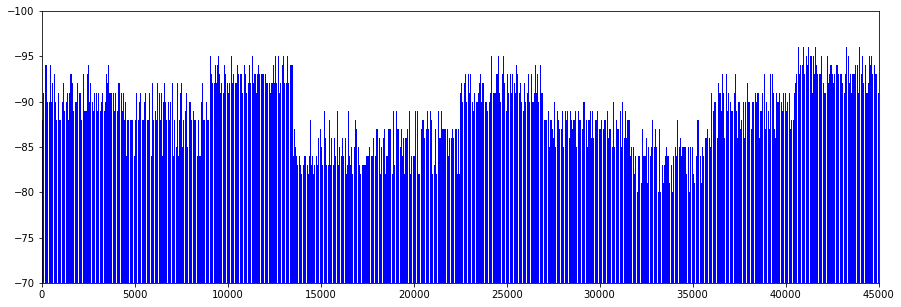

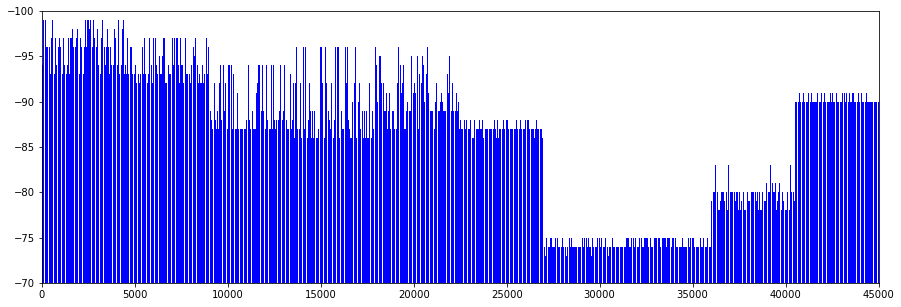

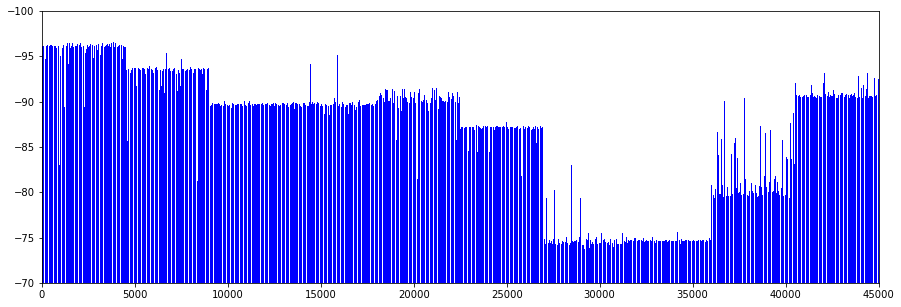

In [20]:
begin = -70
end = -100

y = x_in_train_denoised[:,[0]].T[0]
make_plot(y, train_set_num * 10, begin, end)

y = x_out_train_denoised[:,[0]].T[0]
make_plot(y, train_set_num * 10, begin, end)

after_autoencoder_x_train = autoencoder_04.predict(ae_x_in_train_denoised) * (-100)
make_plot(after_autoencoder_x_train[:, [0]].T[0], train_set_num * 10, begin, end)

In [21]:
autoencoder_04.save('autoencoder_04.h5')

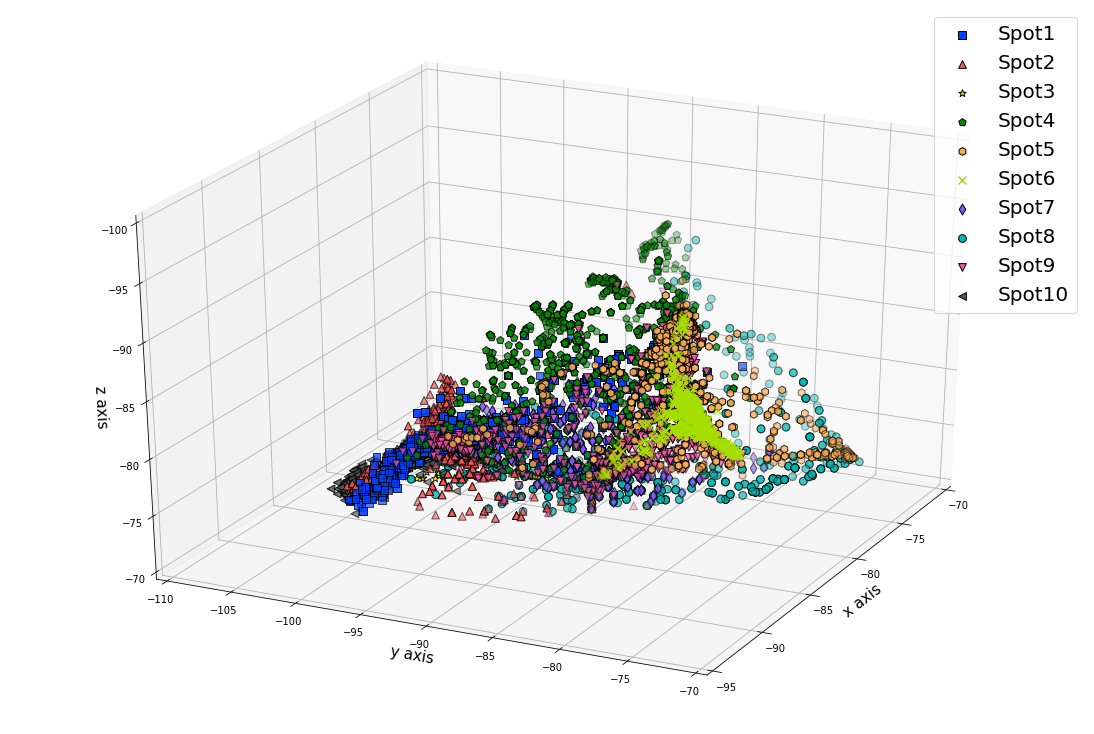

In [22]:
import numpy as np

def divide_area_value(x_data, set_num):
    area = {1:[], 2:[], 3:[], 4:[], 5:[], 6:[], 7:[], 8:[], 9:[], 10:[]}
    for num in range(0, 10):
        begin = num * set_num
        end = (num + 1) * set_num
        area[num + 1] = x_data[begin:end, 0:3]
        
    return area

def convert_array_into_list(data):
    for num in range(1, 11):
        data[num] = data[num].tolist()
        
    return data

def convert_array_into_transpose(data, set_num):
    d1 = data[0:set_num,[0]].T[0]
    d2 = data[0:set_num,[1]].T[0]
    d3 = data[0:set_num,[2]].T[0]
    data_list = [d1, d2, d3]
    
    return data_list

x = after_autoencoder_x_test
y = x_out_test_denoised[:,[0]].T[0]

area = divide_area_value(x, test_set_num)

area1 = convert_array_into_transpose(area[1], test_set_num)
area2 = convert_array_into_transpose(area[2], test_set_num)
area3 = convert_array_into_transpose(area[3], test_set_num)
area4 = convert_array_into_transpose(area[4], test_set_num)
area5 = convert_array_into_transpose(area[5], test_set_num)
area6 = convert_array_into_transpose(area[6], test_set_num)
area7 = convert_array_into_transpose(area[7], test_set_num)
area8 = convert_array_into_transpose(area[8], test_set_num)
area9 = convert_array_into_transpose(area[9], test_set_num)
area10 = convert_array_into_transpose(area[10], test_set_num)

from mpl_toolkits.mplot3d import Axes3D, axes3d
import matplotlib.pyplot as plt
import mglearn

fig = plt.figure(figsize=(15,10))
ax = Axes3D(fig, elev=-152, azim=-26)

area_name = ['Spot1','Spot2','Spot3','Spot4','Spot5','Spot6','Spot7', 'Spot8',
            'Spot9', 'Spot10']
color = ['#0040FF','#FA5858','#FFFF00','#088A08','#FAAC58','#A5DF00','#8258FA', '#04B4AE', '#FA58AC',
        '#585858']
marker = ['s', '^', '*', 'p', 'h', 'x', 'd', 'o', 'v', '<']
size = 60

ax.scatter(area1[0], area1[1], area1[2], label=area_name[0], c=color[0], marker=marker[0], cmap=mglearn.cm2, s=size, edgecolor='k')
ax.scatter(area2[0], area2[1], area2[2], label=area_name[1], c=color[1], marker=marker[1], cmap=mglearn.cm2, s=size, edgecolor='k')
ax.scatter(area3[0], area3[1], area3[2], label=area_name[2], c=color[2], marker=marker[2], cmap=mglearn.cm2, s=size, edgecolor='k')
ax.scatter(area4[0], area4[1], area4[2], label=area_name[3], c=color[3], marker=marker[3], cmap=mglearn.cm2, s=size, edgecolor='k')
ax.scatter(area5[0], area5[1], area5[2], label=area_name[4], c=color[4], marker=marker[4], cmap=mglearn.cm2, s=size, edgecolor='k')
ax.scatter(area6[0], area6[1], area6[2], label=area_name[5], c=color[5], marker=marker[5], cmap=mglearn.cm2, s=size, edgecolor='k')
ax.scatter(area7[0], area7[1], area7[2], label=area_name[6], c=color[6], marker=marker[6], cmap=mglearn.cm2, s=size, edgecolor='k')
ax.scatter(area8[0], area8[1], area8[2], label=area_name[7], c=color[7], marker=marker[7], cmap=mglearn.cm2, s=size, edgecolor='k')
ax.scatter(area9[0], area9[1], area9[2], label=area_name[8], c=color[8], marker=marker[8], cmap=mglearn.cm2, s=size, edgecolor='k')
ax.scatter(area10[0], area10[1], area10[2], label=area_name[9], c=color[9], marker=marker[9], cmap=mglearn.cm2, s=size, edgecolor='k')

params = {'legend.fontsize': 20,
          'legend.handlelength': 2,}

plt.rcParams.update(params)

ax.set_xlabel('x axis', fontsize=15)
ax.set_ylabel('y axis', fontsize=15)
ax.set_zlabel('z axis', fontsize=15)

ax.set_xlim((-95, -70))
ax.set_ylim((-110, -70))
ax.set_zlim((-100, -70))

ax.legend()

#File Saving
file_name = "autoencoder_04.svg"
plt.savefig(file_name)

plt.show()

## Original Data Graph

## in (noisy)

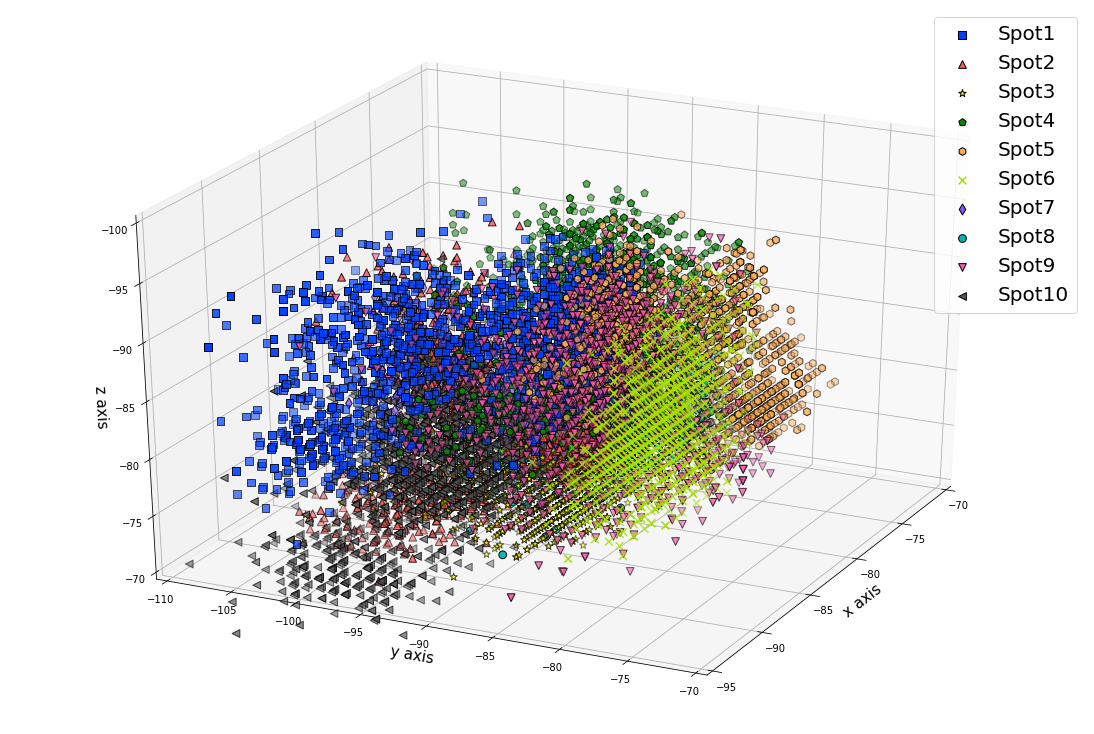

In [23]:
import numpy as np

def divide_area_value(x_data, set_num):
    area = {1:[], 2:[], 3:[], 4:[], 5:[], 6:[], 7:[], 8:[], 9:[], 10:[]}
    for num in range(0, 10):
        begin = num * set_num
        end = (num + 1) * set_num
        area[num + 1] = x_data[begin:end, 0:3]
        
    return area

def convert_array_into_list(data):
    for num in range(1, 11):
        data[num] = data[num].tolist()
        
    return data

def convert_array_into_transpose(data, set_num):
    d1 = data[0:set_num,[0]].T[0]
    d2 = data[0:set_num,[1]].T[0]
    d3 = data[0:set_num,[2]].T[0]
    data_list = [d1, d2, d3]
    
    return data_list

x = x_in_test_noisy
y = x_in_test_noisy[:,[0]].T[0]

area = divide_area_value(x, test_set_num)

area1 = convert_array_into_transpose(area[1], test_set_num)
area2 = convert_array_into_transpose(area[2], test_set_num)
area3 = convert_array_into_transpose(area[3], test_set_num)
area4 = convert_array_into_transpose(area[4], test_set_num)
area5 = convert_array_into_transpose(area[5], test_set_num)
area6 = convert_array_into_transpose(area[6], test_set_num)
area7 = convert_array_into_transpose(area[7], test_set_num)
area8 = convert_array_into_transpose(area[8], test_set_num)
area9 = convert_array_into_transpose(area[9], test_set_num)
area10 = convert_array_into_transpose(area[10], test_set_num)

from mpl_toolkits.mplot3d import Axes3D, axes3d
import matplotlib.pyplot as plt
import mglearn

fig = plt.figure(figsize=(15,10))
ax = Axes3D(fig, elev=-152, azim=-26)

area_name = ['Spot1','Spot2','Spot3','Spot4','Spot5','Spot6','Spot7', 'Spot8',
            'Spot9', 'Spot10']
color = ['#0040FF','#FA5858','#FFFF00','#088A08','#FAAC58','#A5DF00','#8258FA', '#04B4AE', '#FA58AC',
        '#585858']
marker = ['s', '^', '*', 'p', 'h', 'x', 'd', 'o', 'v', '<']
size = 60

ax.scatter(area1[0], area1[1], area1[2], label=area_name[0], c=color[0], marker=marker[0], cmap=mglearn.cm2, s=size, edgecolor='k')
ax.scatter(area2[0], area2[1], area2[2], label=area_name[1], c=color[1], marker=marker[1], cmap=mglearn.cm2, s=size, edgecolor='k')
ax.scatter(area3[0], area3[1], area3[2], label=area_name[2], c=color[2], marker=marker[2], cmap=mglearn.cm2, s=size, edgecolor='k')
ax.scatter(area4[0], area4[1], area4[2], label=area_name[3], c=color[3], marker=marker[3], cmap=mglearn.cm2, s=size, edgecolor='k')
ax.scatter(area5[0], area5[1], area5[2], label=area_name[4], c=color[4], marker=marker[4], cmap=mglearn.cm2, s=size, edgecolor='k')
ax.scatter(area6[0], area6[1], area6[2], label=area_name[5], c=color[5], marker=marker[5], cmap=mglearn.cm2, s=size, edgecolor='k')
ax.scatter(area7[0], area7[1], area7[2], label=area_name[6], c=color[6], marker=marker[6], cmap=mglearn.cm2, s=size, edgecolor='k')
ax.scatter(area8[0], area8[1], area8[2], label=area_name[7], c=color[7], marker=marker[7], cmap=mglearn.cm2, s=size, edgecolor='k')
ax.scatter(area9[0], area9[1], area9[2], label=area_name[8], c=color[8], marker=marker[8], cmap=mglearn.cm2, s=size, edgecolor='k')
ax.scatter(area10[0], area10[1], area10[2], label=area_name[9], c=color[9], marker=marker[9], cmap=mglearn.cm2, s=size, edgecolor='k')

params = {'legend.fontsize': 20,
          'legend.handlelength': 2,}

plt.rcParams.update(params)

ax.set_xlabel('x axis', fontsize=15)
ax.set_ylabel('y axis', fontsize=15)
ax.set_zlabel('z axis', fontsize=15)

ax.set_xlim((-95, -70))
ax.set_ylim((-110, -70))
ax.set_zlim((-100, -70))

ax.legend()

#File Saving
file_name = "in(noisy).svg"
plt.savefig(file_name)

plt.show()

## in (filtered)

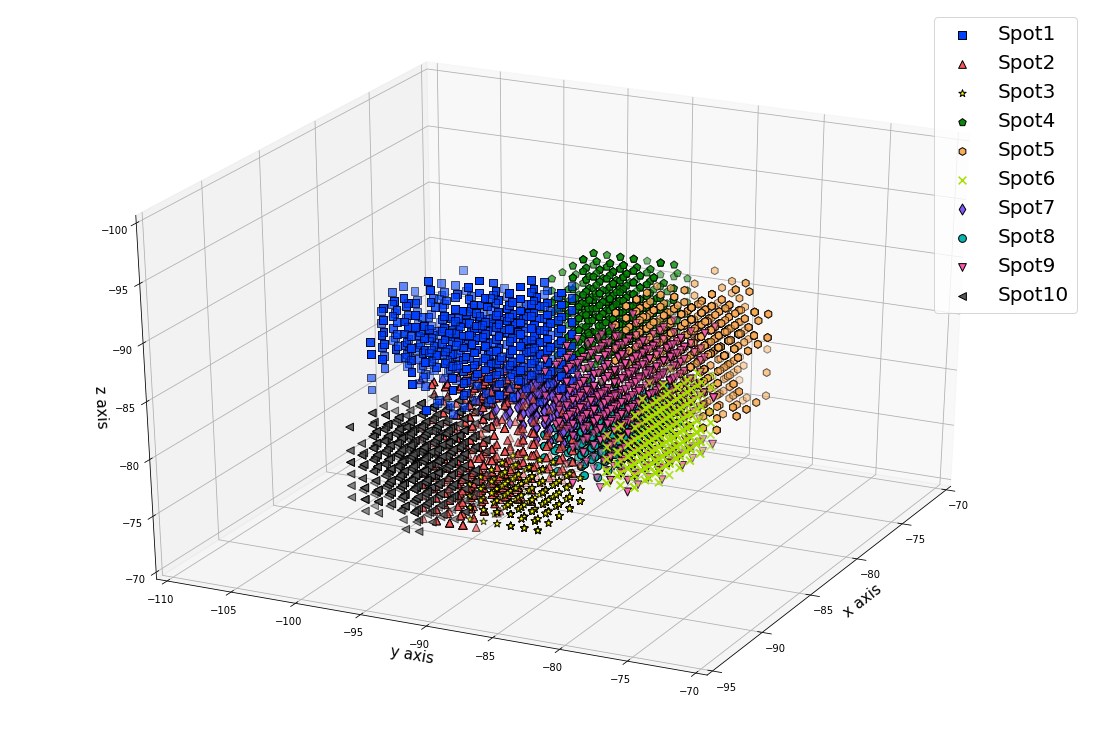

In [24]:
import numpy as np

def divide_area_value(x_data, set_num):
    area = {1:[], 2:[], 3:[], 4:[], 5:[], 6:[], 7:[], 8:[], 9:[], 10:[]}
    for num in range(0, 10):
        begin = num * set_num
        end = (num + 1) * set_num
        area[num + 1] = x_data[begin:end, 0:3]
        
    return area

def convert_array_into_list(data):
    for num in range(1, 11):
        data[num] = data[num].tolist()
        
    return data

def convert_array_into_transpose(data, set_num):
    d1 = data[0:set_num,[0]].T[0]
    d2 = data[0:set_num,[1]].T[0]
    d3 = data[0:set_num,[2]].T[0]
    data_list = [d1, d2, d3]
    
    return data_list

x = x_in_test_denoised
y = x_in_test_denoised[:,[0]].T[0]

area = divide_area_value(x, test_set_num)

area1 = convert_array_into_transpose(area[1], test_set_num)
area2 = convert_array_into_transpose(area[2], test_set_num)
area3 = convert_array_into_transpose(area[3], test_set_num)
area4 = convert_array_into_transpose(area[4], test_set_num)
area5 = convert_array_into_transpose(area[5], test_set_num)
area6 = convert_array_into_transpose(area[6], test_set_num)
area7 = convert_array_into_transpose(area[7], test_set_num)
area8 = convert_array_into_transpose(area[8], test_set_num)
area9 = convert_array_into_transpose(area[9], test_set_num)
area10 = convert_array_into_transpose(area[10], test_set_num)

from mpl_toolkits.mplot3d import Axes3D, axes3d
import matplotlib.pyplot as plt
import mglearn

fig = plt.figure(figsize=(15,10))
ax = Axes3D(fig, elev=-152, azim=-26)

area_name = ['Spot1','Spot2','Spot3','Spot4','Spot5','Spot6','Spot7', 'Spot8',
            'Spot9', 'Spot10']
color = ['#0040FF','#FA5858','#FFFF00','#088A08','#FAAC58','#A5DF00','#8258FA', '#04B4AE', '#FA58AC',
        '#585858']
marker = ['s', '^', '*', 'p', 'h', 'x', 'd', 'o', 'v', '<']
size = 60

ax.scatter(area1[0], area1[1], area1[2], label=area_name[0], c=color[0], marker=marker[0], cmap=mglearn.cm2, s=size, edgecolor='k')
ax.scatter(area2[0], area2[1], area2[2], label=area_name[1], c=color[1], marker=marker[1], cmap=mglearn.cm2, s=size, edgecolor='k')
ax.scatter(area3[0], area3[1], area3[2], label=area_name[2], c=color[2], marker=marker[2], cmap=mglearn.cm2, s=size, edgecolor='k')
ax.scatter(area4[0], area4[1], area4[2], label=area_name[3], c=color[3], marker=marker[3], cmap=mglearn.cm2, s=size, edgecolor='k')
ax.scatter(area5[0], area5[1], area5[2], label=area_name[4], c=color[4], marker=marker[4], cmap=mglearn.cm2, s=size, edgecolor='k')
ax.scatter(area6[0], area6[1], area6[2], label=area_name[5], c=color[5], marker=marker[5], cmap=mglearn.cm2, s=size, edgecolor='k')
ax.scatter(area7[0], area7[1], area7[2], label=area_name[6], c=color[6], marker=marker[6], cmap=mglearn.cm2, s=size, edgecolor='k')
ax.scatter(area8[0], area8[1], area8[2], label=area_name[7], c=color[7], marker=marker[7], cmap=mglearn.cm2, s=size, edgecolor='k')
ax.scatter(area9[0], area9[1], area9[2], label=area_name[8], c=color[8], marker=marker[8], cmap=mglearn.cm2, s=size, edgecolor='k')
ax.scatter(area10[0], area10[1], area10[2], label=area_name[9], c=color[9], marker=marker[9], cmap=mglearn.cm2, s=size, edgecolor='k')

params = {'legend.fontsize': 20,
          'legend.handlelength': 2,}

plt.rcParams.update(params)

ax.set_xlabel('x axis', fontsize=15)
ax.set_ylabel('y axis', fontsize=15)
ax.set_zlabel('z axis', fontsize=15)

ax.set_xlim((-95, -70))
ax.set_ylim((-110, -70))
ax.set_zlim((-100, -70))

ax.legend()

#File Saving
file_name = "in(filtered).svg"
plt.savefig(file_name)

plt.show()

## out (noisy)

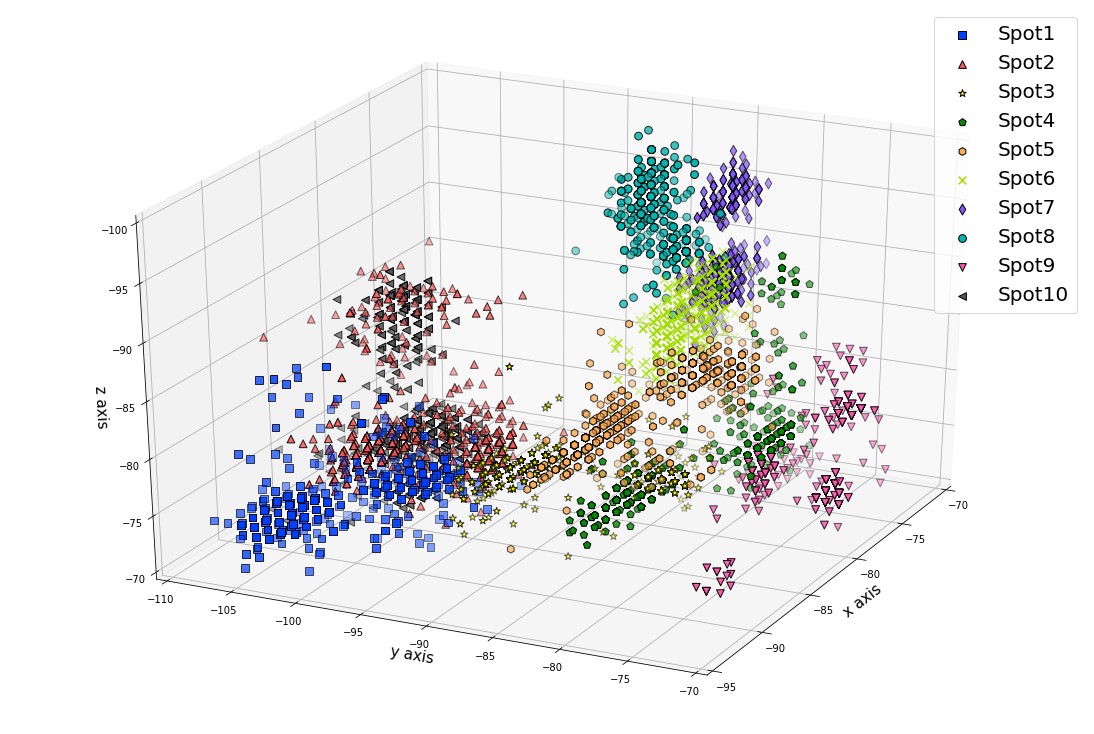

In [25]:
import numpy as np

def divide_area_value(x_data, set_num):
    area = {1:[], 2:[], 3:[], 4:[], 5:[], 6:[], 7:[], 8:[], 9:[], 10:[]}
    for num in range(0, 10):
        begin = num * set_num
        end = (num + 1) * set_num
        area[num + 1] = x_data[begin:end, 0:3]
        
    return area

def convert_array_into_list(data):
    for num in range(1, 11):
        data[num] = data[num].tolist()
        
    return data

def convert_array_into_transpose(data, set_num):
    d1 = data[0:set_num,[0]].T[0]
    d2 = data[0:set_num,[1]].T[0]
    d3 = data[0:set_num,[2]].T[0]
    data_list = [d1, d2, d3]
    
    return data_list

x = x_out_test_noisy
y = x_out_test_noisy[:,[0]].T[0]

area = divide_area_value(x, test_set_num)

area1 = convert_array_into_transpose(area[1], test_set_num)
area2 = convert_array_into_transpose(area[2], test_set_num)
area3 = convert_array_into_transpose(area[3], test_set_num)
area4 = convert_array_into_transpose(area[4], test_set_num)
area5 = convert_array_into_transpose(area[5], test_set_num)
area6 = convert_array_into_transpose(area[6], test_set_num)
area7 = convert_array_into_transpose(area[7], test_set_num)
area8 = convert_array_into_transpose(area[8], test_set_num)
area9 = convert_array_into_transpose(area[9], test_set_num)
area10 = convert_array_into_transpose(area[10], test_set_num)

from mpl_toolkits.mplot3d import Axes3D, axes3d
import matplotlib.pyplot as plt
import mglearn

fig = plt.figure(figsize=(15,10))
ax = Axes3D(fig, elev=-152, azim=-26)

area_name = ['Spot1','Spot2','Spot3','Spot4','Spot5','Spot6','Spot7', 'Spot8',
            'Spot9', 'Spot10']
color = ['#0040FF','#FA5858','#FFFF00','#088A08','#FAAC58','#A5DF00','#8258FA', '#04B4AE', '#FA58AC',
        '#585858']
marker = ['s', '^', '*', 'p', 'h', 'x', 'd', 'o', 'v', '<']
size = 60

ax.scatter(area1[0], area1[1], area1[2], label=area_name[0], c=color[0], marker=marker[0], cmap=mglearn.cm2, s=size, edgecolor='k')
ax.scatter(area2[0], area2[1], area2[2], label=area_name[1], c=color[1], marker=marker[1], cmap=mglearn.cm2, s=size, edgecolor='k')
ax.scatter(area3[0], area3[1], area3[2], label=area_name[2], c=color[2], marker=marker[2], cmap=mglearn.cm2, s=size, edgecolor='k')
ax.scatter(area4[0], area4[1], area4[2], label=area_name[3], c=color[3], marker=marker[3], cmap=mglearn.cm2, s=size, edgecolor='k')
ax.scatter(area5[0], area5[1], area5[2], label=area_name[4], c=color[4], marker=marker[4], cmap=mglearn.cm2, s=size, edgecolor='k')
ax.scatter(area6[0], area6[1], area6[2], label=area_name[5], c=color[5], marker=marker[5], cmap=mglearn.cm2, s=size, edgecolor='k')
ax.scatter(area7[0], area7[1], area7[2], label=area_name[6], c=color[6], marker=marker[6], cmap=mglearn.cm2, s=size, edgecolor='k')
ax.scatter(area8[0], area8[1], area8[2], label=area_name[7], c=color[7], marker=marker[7], cmap=mglearn.cm2, s=size, edgecolor='k')
ax.scatter(area9[0], area9[1], area9[2], label=area_name[8], c=color[8], marker=marker[8], cmap=mglearn.cm2, s=size, edgecolor='k')
ax.scatter(area10[0], area10[1], area10[2], label=area_name[9], c=color[9], marker=marker[9], cmap=mglearn.cm2, s=size, edgecolor='k')

params = {'legend.fontsize': 20,
          'legend.handlelength': 2,}

plt.rcParams.update(params)

ax.set_xlabel('x axis', fontsize=15)
ax.set_ylabel('y axis', fontsize=15)
ax.set_zlabel('z axis', fontsize=15)

ax.set_xlim((-95, -70))
ax.set_ylim((-110, -70))
ax.set_zlim((-100, -70))

ax.legend()

#File Saving
file_name = "out(noisy).svg"
plt.savefig(file_name)

plt.show()

## out (filtered)

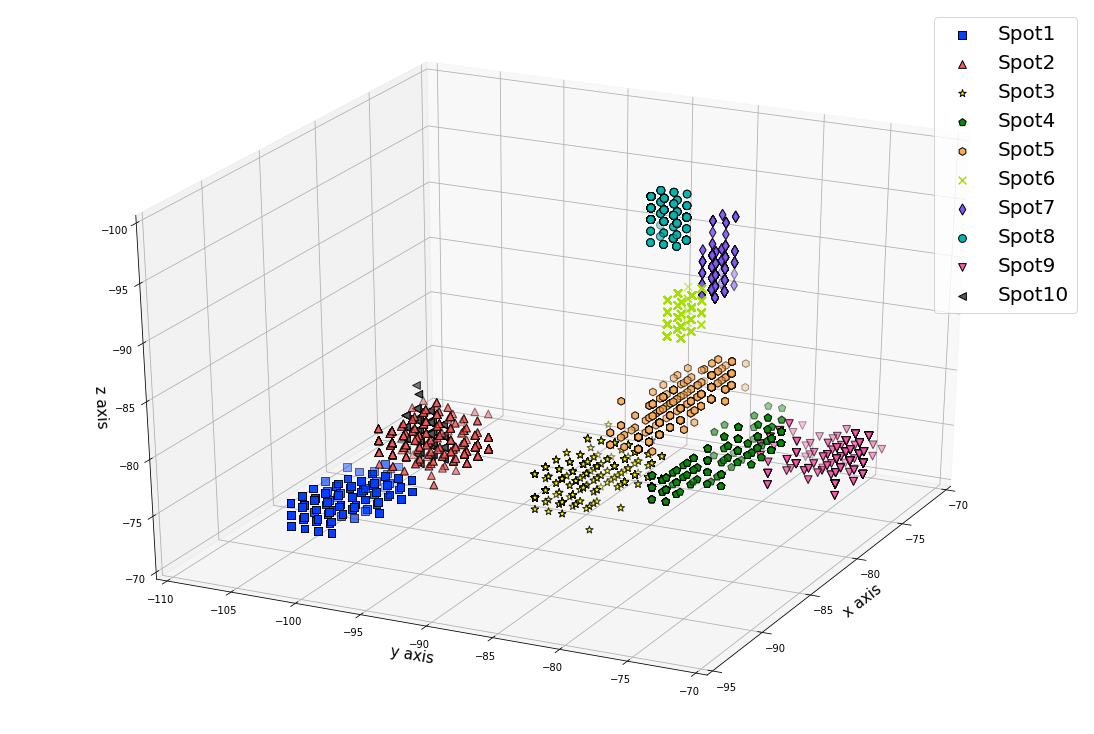

In [26]:
import numpy as np

def divide_area_value(x_data, set_num):
    area = {1:[], 2:[], 3:[], 4:[], 5:[], 6:[], 7:[], 8:[], 9:[], 10:[]}
    for num in range(0, 10):
        begin = num * set_num
        end = (num + 1) * set_num
        area[num + 1] = x_data[begin:end, 0:3]
        
    return area

def convert_array_into_list(data):
    for num in range(1, 11):
        data[num] = data[num].tolist()
        
    return data

def convert_array_into_transpose(data, set_num):
    d1 = data[0:set_num,[0]].T[0]
    d2 = data[0:set_num,[1]].T[0]
    d3 = data[0:set_num,[2]].T[0]
    data_list = [d1, d2, d3]
    
    return data_list

x = x_out_test_denoised
y = x_out_test_denoised[:,[0]].T[0]

area = divide_area_value(x, test_set_num)

area1 = convert_array_into_transpose(area[1], test_set_num)
area2 = convert_array_into_transpose(area[2], test_set_num)
area3 = convert_array_into_transpose(area[3], test_set_num)
area4 = convert_array_into_transpose(area[4], test_set_num)
area5 = convert_array_into_transpose(area[5], test_set_num)
area6 = convert_array_into_transpose(area[6], test_set_num)
area7 = convert_array_into_transpose(area[7], test_set_num)
area8 = convert_array_into_transpose(area[8], test_set_num)
area9 = convert_array_into_transpose(area[9], test_set_num)
area10 = convert_array_into_transpose(area[10], test_set_num)

from mpl_toolkits.mplot3d import Axes3D, axes3d
import matplotlib.pyplot as plt
import mglearn

fig = plt.figure(figsize=(15,10))
ax = Axes3D(fig, elev=-152, azim=-26)

area_name = ['Spot1','Spot2','Spot3','Spot4','Spot5','Spot6','Spot7', 'Spot8',
            'Spot9', 'Spot10']
color = ['#0040FF','#FA5858','#FFFF00','#088A08','#FAAC58','#A5DF00','#8258FA', '#04B4AE', '#FA58AC',
        '#585858']
marker = ['s', '^', '*', 'p', 'h', 'x', 'd', 'o', 'v', '<']
size = 60

ax.scatter(area1[0], area1[1], area1[2], label=area_name[0], c=color[0], marker=marker[0], cmap=mglearn.cm2, s=size, edgecolor='k')
ax.scatter(area2[0], area2[1], area2[2], label=area_name[1], c=color[1], marker=marker[1], cmap=mglearn.cm2, s=size, edgecolor='k')
ax.scatter(area3[0], area3[1], area3[2], label=area_name[2], c=color[2], marker=marker[2], cmap=mglearn.cm2, s=size, edgecolor='k')
ax.scatter(area4[0], area4[1], area4[2], label=area_name[3], c=color[3], marker=marker[3], cmap=mglearn.cm2, s=size, edgecolor='k')
ax.scatter(area5[0], area5[1], area5[2], label=area_name[4], c=color[4], marker=marker[4], cmap=mglearn.cm2, s=size, edgecolor='k')
ax.scatter(area6[0], area6[1], area6[2], label=area_name[5], c=color[5], marker=marker[5], cmap=mglearn.cm2, s=size, edgecolor='k')
ax.scatter(area7[0], area7[1], area7[2], label=area_name[6], c=color[6], marker=marker[6], cmap=mglearn.cm2, s=size, edgecolor='k')
ax.scatter(area8[0], area8[1], area8[2], label=area_name[7], c=color[7], marker=marker[7], cmap=mglearn.cm2, s=size, edgecolor='k')
ax.scatter(area9[0], area9[1], area9[2], label=area_name[8], c=color[8], marker=marker[8], cmap=mglearn.cm2, s=size, edgecolor='k')
ax.scatter(area10[0], area10[1], area10[2], label=area_name[9], c=color[9], marker=marker[9], cmap=mglearn.cm2, s=size, edgecolor='k')

params = {'legend.fontsize': 20,
          'legend.handlelength': 2,}

plt.rcParams.update(params)

ax.set_xlabel('x axis', fontsize=15)
ax.set_ylabel('y axis', fontsize=15)
ax.set_zlabel('z axis', fontsize=15)

ax.set_xlim((-95, -70))
ax.set_ylim((-110, -70))
ax.set_zlim((-100, -70))

ax.legend()

#File Saving
file_name = "out(filtered).svg"
plt.savefig(file_name)

plt.show()